Results from demographic + experience smartwatch survey
====

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
"""
Read in the questionnaire data

"""
import pandas as pd

# Need to mount the SEACO RDSF drive here
path = "/mnt/z/SEACO data/SEACO-CH20 qnaire data/SEACO_CH20_17082022_de_id.csv"
qnaire_data = pd.read_csv(path)

qnaire_data.head()

/tmp/ipykernel_21120/3104238101.py:9: DtypeWarning: Columns (17,25,26,52,197,198,200,201,209,210,212,213,216,218,219,222,225,227,228,230,231,233,234,236,237,239,240,243,246,248,249,252,254,255,257,258,261,263,264,267,269,270,272,273,276,279,281,284,291,293,294,296,297,300,302,303,305,306,309,311,312,314,315,317,318,321,324,327,330,344,351,352,354,355,360,361,362,363,364,369,370,371,372,373,378,379,380,381,382,387,390,391,396,397,398,399,400,406,407,415,425,432,434,435,436,446,456,486,499,504,506,512,513,549) have mixed types. Specify dtype option on import or set low_memory=False.
  qnaire_data = pd.read_csv(path)


,deviceid,updatelistselected,barcodehouse,residents_id,respondent_status,verify_note,verify_address,address_barcode,respondent_sex,respondent_ethnicity,...,field_note,formdef_version,key,review_quality,review_corrections,submissiondate,starttime,endtime,dob,bp_start
0,1111dda705a8df02,2104,JBI000024,2104,1,NaN,1.0,1.0,1.0,1.0,...,Done blood,2.112000e+09,uuid:9c4dfbbd-efd6-4dfa-bd94-35e1e64a7f45,OKAY,"nurul.syazwana@monash.edu (Mar 11, 2022 4:21:3...",19jan2022 09:17:38,18jan2022 21:44:56,19jan2022 08:59:50,13mar2007,18jan2022
1,1833a79c47db6bdc,2864,GMH000071,2864,1,NaN,1.0,1.0,1.0,1.0,...,NaN,2.112000e+09,uuid:cd20720f-3c19-48f9-bc27-76f749e257c9,OKAY,NaN,26jan2022 12:01:19,21jan2022 16:22:03,24jan2022 11:32:27,11jul2013,24jan2022
2,1833a79c47db6bdc,15697,GMH000980,15697,1,NaN,1.0,1.0,1.0,1.0,...,NaN,2.112000e+09,uuid:39a85c45-a319-45e7-bbab-ff683d328ef9,GOOD,NaN,26jan2022 12:01:19,24jan2022 11:37:03,24jan2022 12:01:56,10mar2008,24jan2022
3,1833a79c47db6bdc,1382,JBI000014,1382,1,NaN,1.0,1.0,1.0,1.0,...,NaN,2.112000e+09,uuid:3471f3f6-fe16-4d76-b747-210b12d2266a,GOOD,NaN,26jan2022 12:01:20,24jan2022 12:12:45,26jan2022 11:35:36,13jan2013,26jan2022
4,1833a79c47db6bdc,3632,JBI000329,3632,1,NaN,1.0,1.0,2.0,1.0,...,NaN,2.112000e+09,uuid:42cc75b5-cd1e-4099-b8a7-f92963922c56,OKAY,NaN,28jan2022 11:20:00,06jan2022 22:38:14,26jan2022 13:44:00,29mar2013,07jan2022


In [3]:
"""
Choose only respondents who agreed to take part

"""
accepted_df = qnaire_data[qnaire_data["respondent_status"] == 1].copy()
len(accepted_df)

626

In [4]:
"""
Add a column for age group

"""
import numpy as np

lims = (7, 9, 18)
accepted_df["child"] = (accepted_df["age_dob"] >= lims[0]) & (
    accepted_df["age_dob"] <= lims[1]
)
accepted_df["adolescent"] = (accepted_df["age_dob"] > lims[1]) & (
    accepted_df["age_dob"] <= lims[2]
)

# Check no overlap
assert not (accepted_df["child"] & accepted_df["adolescent"]).any()

# Check no unassigned
assert (accepted_df["child"] | accepted_df["adolescent"]).all()

In [5]:
"""
Find the number of each who agreed to take part in the smartwatch study

"""

# We only care about the participants who were asked about the smartwatches
child_df = accepted_df[accepted_df["child"] & ~pd.isna(accepted_df["smart1_7to9"])]
adolescent_df = accepted_df[
    accepted_df["adolescent"] & ~pd.isna(accepted_df["smart1_10to17"])
]

child_df["smart1_7to9"].value_counts(dropna=False), adolescent_df["smart1_10to17"].value_counts(dropna=False)

(smart1_7to9
 1.0    4
 2.0    1
 Name: count, dtype: int64,
 smart1_10to17
 1.0    79
 2.0     3
 Name: count, dtype: int64)

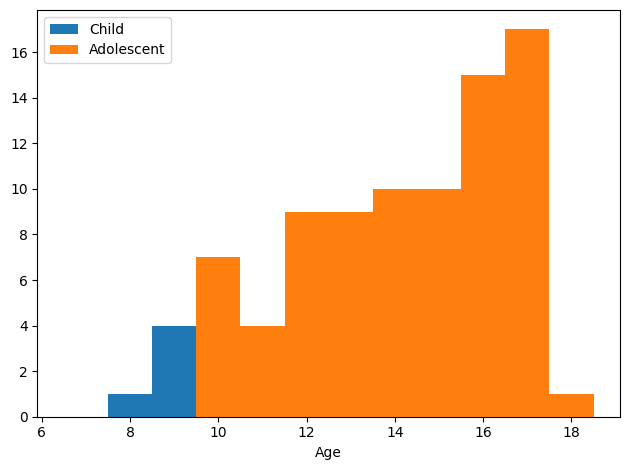

In [6]:
""" Histogram of ages """

import matplotlib.pyplot as plt

fig, axis = plt.subplots()

bins = np.linspace(6.5, 18.5, 13)
child_df["age_dob"].hist(ax=axis, bins=bins, label="Child")
adolescent_df["age_dob"].hist(ax=axis, bins=bins, label="Adolescent", color="C1")

axis.grid(False)
axis.legend()
axis.set_xlabel("Age")

fig.tight_layout()

In [7]:
"""
For the participants who didn't take part, find out why

"""

print(child_df[child_df["smart1_7to9"] == 2]["smart2_7to9"].value_counts(dropna=False))

# Here, 7 means "Other"
print(
    child_df[(child_df["smart1_7to9"] == 2) & (child_df["smart2_7to9"] == 7)][
        "smart2a_7to9"
    ]
)

smart2_7to9
7.0    1
Name: count, dtype: int64
41   -99.0
Name: smart2a_7to9, dtype: float64


In [8]:
print(
    adolescent_df[adolescent_df["smart1_10to17"] == 2]["smart2_10to17"].value_counts(
        dropna=False
    )
)

# Here, 7 means "Other" and -9 means "Refused to answer"
print(
    adolescent_df[
        (adolescent_df["smart1_10to17"] == 2) & (adolescent_df["smart2_10to17"] == 7)
    ]["smart2a_10to17"]
)

smart2_10to17
-9.0    1
 7.0    1
 NaN    1
Name: count, dtype: int64
94    takut bawa ke sekolah
Name: smart2a_10to17, dtype: object


smart3_7to9
0.0    2
3.0    1
5.0    1
4.0    1
Name: count, dtype: int64

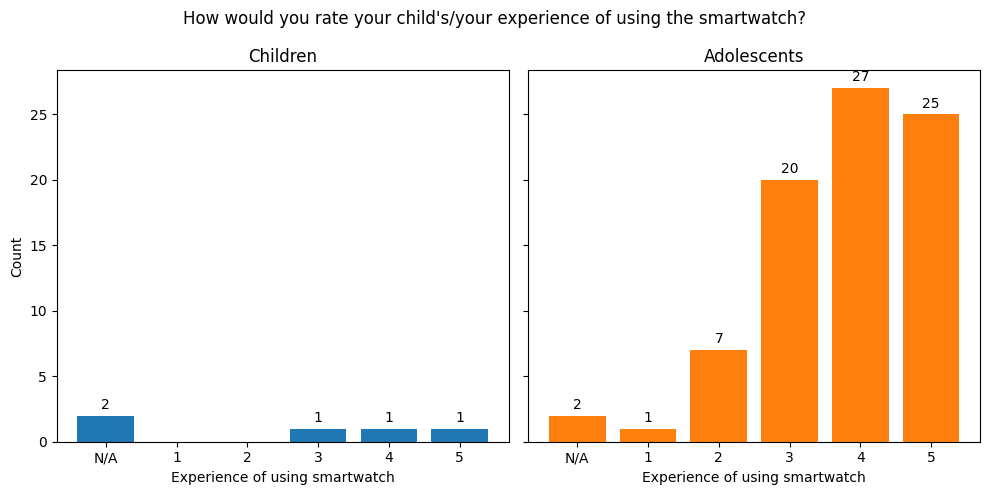

In [9]:
"""
Make a bar chart of experience of using the smartwatch

"""

child_counts = child_df["smart3_7to9"].value_counts(dropna=False)
adolescent_counts = adolescent_df["smart3_10to17"].value_counts(dropna=False)

# Replace the NaN in the index with 0
child_counts.index = child_counts.index.fillna(0)
adolescent_counts.index = adolescent_counts.index.fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

axes[0].bar(child_counts.index, child_counts.values)
axes[1].bar(adolescent_counts.index, adolescent_counts.values, color="")

# Label each bar with the number
for i, v in child_counts.items():
    axes[0].text(i, v + 0.5, str(v), ha="center")
for i, v in adolescent_counts.items():
    axes[1].text(i, v + 0.5, str(v), ha="center")


for axis in axes:
    axis.set_xlabel("Experience of using smartwatch")
    axis.set_xticks(range(6), ["N/A", *range(1, 6)])

axes[0].set_title("Children")
axes[0].set_ylabel("Count")
axes[1].set_title("Adolescents")

fig.suptitle("How would you rate your child's/your experience of using the smartwatch?")
fig.tight_layout()
child_counts

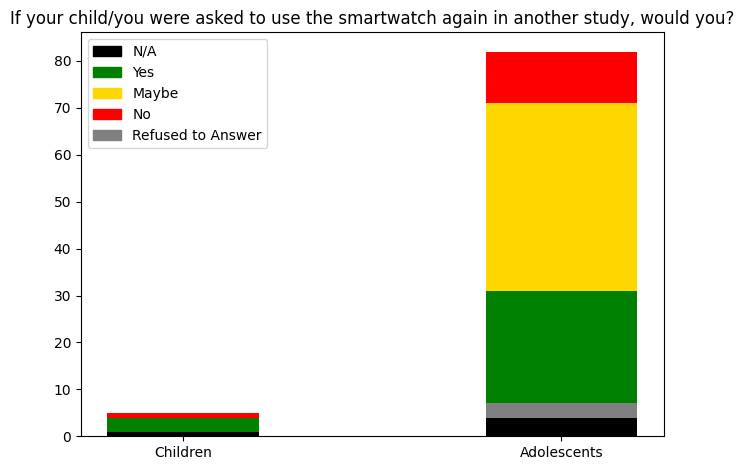

In [10]:
"""
Would you do it again?

"""

fig, axis = plt.subplots()

child_counts = child_df["smart4_7to9"].value_counts(dropna=False)
adolescent_counts = adolescent_df["smart4_10to17"].value_counts(dropna=False)

# Fill NA with a negative value so it appears at the bottom of my plot
na_val = -100
child_counts.index = child_counts.index.fillna(na_val)
adolescent_counts.index = adolescent_counts.index.fillna(na_val)

child_counts.sort_index(inplace=True)
adolescent_counts.sort_index(inplace=True)

child_counts, adolescent_counts
# Stacked bar chart
color = {na_val: "k", 1.0: "g", 2.0: "gold", 3.0: "r", -9.0: "grey"}

total = 0
for val, count in child_counts.items():
    axis.bar(0, count, color=color[val], label=i, bottom=total, width=0.4)
    total += count

total = 0
for val, count in adolescent_counts.items():
    axis.bar(1, count, color=color[val], label=i, bottom=total, width=0.4)
    total += count

axis.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color[val]) for val in color],
    labels=["N/A", "Yes", "Maybe", "No", "Refused to Answer"],
)

axis.set_xticks([0, 1], ["Children", "Adolescents"])

axis.set_title(
    "If your child/you were asked to use the smartwatch again in another study, would you?"
)

fig.tight_layout()

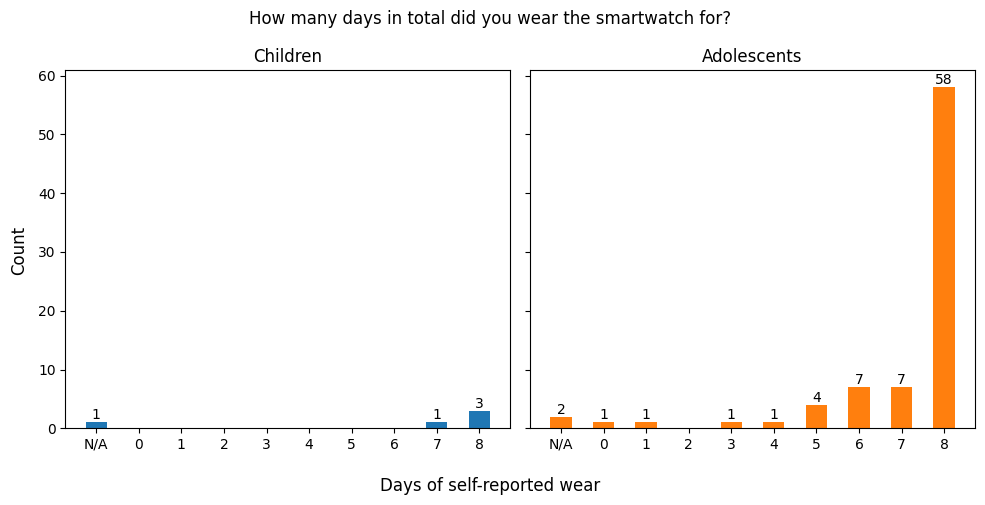

In [12]:
"""
Days of self-reported wear

"""

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

child_counts = child_df["smart5_7to9"].value_counts(dropna=False)
adolescent_counts = adolescent_df["smart5_10to17"].value_counts(dropna=False)

# Fill NA with a negative value so it appears at the bottom of my plot
na_val = -1
child_counts.index = child_counts.index.fillna(na_val)
adolescent_counts.index = adolescent_counts.index.fillna(na_val)

child_counts.sort_index(inplace=True)
adolescent_counts.sort_index(inplace=True)

for i, val in child_counts.items():
    axes[0].bar(i, val, color="C0", width=0.5)
for i, val in adolescent_counts.items():
    axes[1].bar(i, val, color="C1", width=0.5)

# Label each bar with the number
for i, v in child_counts.items():
    axes[0].text(i, v + 0.5, str(v), ha="center")
for i, v in adolescent_counts.items():
    axes[1].text(i, v + 0.5, str(v), ha="center")

for axis in axes:
    axis.set_xticks(range(-1, 9), ["N/A", *range(0, 9)])

axes[0].set_title("Children")
axes[1].set_title("Adolescents")

fig.supxlabel("Days of self-reported wear")
fig.supylabel("Count")
fig.suptitle("How many days in total did you wear the smartwatch for?")

fig.tight_layout()

In [29]:
"""
Reasons given for not wearing the smartwatch for the whole study

"""

child_counts = child_df[child_df["smart5_7to9"] != 8]["smart6_7to9"].value_counts(
    dropna=False
)
child_counts.index = child_counts.index.fillna(na_val)

lookup = {
    -9: "Refused to answer",
    1: "Did not like the look of the smartwatch",
    2: "Did not find the smartwatch comfortable to wear",
    3: "Recharging took too much time",
    4: "Did not see the benefit, when could not see the data",
    5: "Other reasons (please specify)",
    na_val: "N/A",
}

print("Children")
for i, val in child_counts.items():
    print("\t", lookup[i], val)

Children
	 N/A 1
	 Did not find the smartwatch comfortable to wear 1


In [35]:
adolescent_counts = adolescent_df[adolescent_df["smart5_10to17"] != 8][
    "smart6_10to17"
].value_counts(dropna=False)
adolescent_counts.index = adolescent_counts.index.fillna(na_val)

lookup = {
    -9: "Refused to answer",
    1: "Did not like the look of the smartwatch",
    2: "Did not find the smartwatch comfortable to wear",
    3: "Recharging took too much time",
    4: "Did not see the benefit, when could not see the data",
    5: "Other reasons (please specify)",
    na_val: "N/A",
}

print("Adolescents")
for i, val in adolescent_counts.items():
    print("\t", lookup[i], val)


# Other reasons
adolescent_df["smart6a_10to17"].value_counts()

Adolescents
	 Did not find the smartwatch comfortable to wear 10
	 Other reasons (please specify) 7
	 Refused to answer 3
	 N/A 2
	 Did not see the benefit, when could not see the data 2


smart6a_10to17
terlupa pakai selepas aktiviti merenang          1
-99                                              1
pihak sekolah tidak membenarkan memakai gajet    1
Terlupa                                          1
Kehabisan bateri                                 1
Lupa                                             1
Sakit dan gatal                                  1
Name: count, dtype: int64

Malay                                            | Count | English
-------------------------------------------------|-------|------------------------------------------
terlupa pakai selepas aktiviti merenang          | 1     | "Forgot to use after swimming activity"  
-99                                              | 1     | N/A  
pihak sekolah tidak membenarkan memakai gajet    | 1     | "The school does not allow the use of gadgets"  
Terlupa                                          | 1     | "Forgotten"  
Kehabisan bateri                                 | 1     | "Out of battery"   
Lupa                                             | 1     | "Forget"  
Sakit dan gatal                                  | 1     | "Pain and itching"  